## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0002265	total: 56.1ms	remaining: 56.1s
1:	learn: 0.9809663	total: 57.1ms	remaining: 28.5s
2:	learn: 0.9614007	total: 58.2ms	remaining: 19.3s
3:	learn: 0.9434070	total: 59.1ms	remaining: 14.7s
4:	learn: 0.9263269	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9089557	total: 60.8ms	remaining: 10.1s
6:	learn: 0.8924315	total: 61.7ms	remaining: 8.76s
7:	learn: 0.8744368	total: 62.6ms	remaining: 7.76s
8:	learn: 0.8588456	total: 63.4ms	remaining: 6.99s
9:	learn: 0.8419791	total: 64.8ms	remaining: 6.41s
10:	learn: 0.8262627	total: 65.6ms	remaining: 5.89s
11:	learn: 0.8122179	total: 66.3ms	remaining: 5.46s
12:	learn: 0.7961533	total: 67ms	remaining: 5.08s
13:	learn: 0.7812044	total: 67.7ms	remaining: 4.77s
14:	learn: 0.7689986	total: 68.4ms	remaining: 4.49s
15:	learn: 0.7546862	total: 69.1ms	remaining: 4.25s
16:	learn: 0.7421000	total: 69.7ms	remaining: 4.03s
17:	learn: 0.7290469	total: 70.3ms	remaining: 3.84s
18:	learn: 0.7160525	total: 71.1ms	remaining: 

56:	learn: 0.4347375	total: 101ms	remaining: 1.67s
57:	learn: 0.4303709	total: 102ms	remaining: 1.66s
58:	learn: 0.4271111	total: 103ms	remaining: 1.64s
59:	learn: 0.4233582	total: 104ms	remaining: 1.63s
60:	learn: 0.4191925	total: 105ms	remaining: 1.61s
61:	learn: 0.4145193	total: 106ms	remaining: 1.6s
62:	learn: 0.4117846	total: 107ms	remaining: 1.59s
63:	learn: 0.4084687	total: 108ms	remaining: 1.57s
64:	learn: 0.4058767	total: 109ms	remaining: 1.56s
65:	learn: 0.4016169	total: 110ms	remaining: 1.55s
66:	learn: 0.3977966	total: 111ms	remaining: 1.54s
67:	learn: 0.3936138	total: 112ms	remaining: 1.53s
68:	learn: 0.3904503	total: 113ms	remaining: 1.52s
69:	learn: 0.3878455	total: 114ms	remaining: 1.51s
70:	learn: 0.3846725	total: 114ms	remaining: 1.5s
71:	learn: 0.3824852	total: 115ms	remaining: 1.48s
72:	learn: 0.3798471	total: 116ms	remaining: 1.47s
73:	learn: 0.3767821	total: 117ms	remaining: 1.46s
74:	learn: 0.3743755	total: 118ms	remaining: 1.46s
75:	learn: 0.3720711	total: 119ms

165:	learn: 0.2453368	total: 191ms	remaining: 958ms
166:	learn: 0.2444656	total: 192ms	remaining: 957ms
167:	learn: 0.2435138	total: 193ms	remaining: 955ms
168:	learn: 0.2428851	total: 194ms	remaining: 952ms
169:	learn: 0.2421006	total: 194ms	remaining: 949ms
170:	learn: 0.2413202	total: 195ms	remaining: 947ms
171:	learn: 0.2404215	total: 196ms	remaining: 944ms
172:	learn: 0.2397352	total: 197ms	remaining: 941ms
173:	learn: 0.2392588	total: 198ms	remaining: 939ms
174:	learn: 0.2386345	total: 199ms	remaining: 936ms
175:	learn: 0.2382056	total: 199ms	remaining: 933ms
176:	learn: 0.2376908	total: 200ms	remaining: 931ms
177:	learn: 0.2370756	total: 201ms	remaining: 929ms
178:	learn: 0.2366097	total: 202ms	remaining: 927ms
179:	learn: 0.2359814	total: 203ms	remaining: 924ms
180:	learn: 0.2351908	total: 204ms	remaining: 922ms
181:	learn: 0.2344020	total: 205ms	remaining: 919ms
182:	learn: 0.2338193	total: 205ms	remaining: 917ms
183:	learn: 0.2332141	total: 206ms	remaining: 914ms
184:	learn: 

285:	learn: 0.1818193	total: 291ms	remaining: 726ms
286:	learn: 0.1812705	total: 292ms	remaining: 724ms
287:	learn: 0.1806426	total: 292ms	remaining: 723ms
288:	learn: 0.1803207	total: 294ms	remaining: 723ms
289:	learn: 0.1799419	total: 295ms	remaining: 722ms
290:	learn: 0.1796316	total: 296ms	remaining: 721ms
291:	learn: 0.1793231	total: 296ms	remaining: 719ms
292:	learn: 0.1787448	total: 297ms	remaining: 717ms
293:	learn: 0.1784702	total: 298ms	remaining: 716ms
294:	learn: 0.1781055	total: 299ms	remaining: 714ms
295:	learn: 0.1775874	total: 300ms	remaining: 713ms
296:	learn: 0.1772544	total: 300ms	remaining: 711ms
297:	learn: 0.1767665	total: 301ms	remaining: 710ms
298:	learn: 0.1764573	total: 302ms	remaining: 709ms
299:	learn: 0.1760972	total: 303ms	remaining: 707ms
300:	learn: 0.1755771	total: 304ms	remaining: 706ms
301:	learn: 0.1749934	total: 305ms	remaining: 704ms
302:	learn: 0.1745883	total: 306ms	remaining: 703ms
303:	learn: 0.1741113	total: 309ms	remaining: 707ms
304:	learn: 

363:	learn: 0.1565770	total: 379ms	remaining: 662ms
364:	learn: 0.1563926	total: 380ms	remaining: 661ms
365:	learn: 0.1562771	total: 381ms	remaining: 660ms
366:	learn: 0.1561991	total: 382ms	remaining: 658ms
367:	learn: 0.1561438	total: 383ms	remaining: 657ms
368:	learn: 0.1560989	total: 383ms	remaining: 655ms
369:	learn: 0.1559049	total: 384ms	remaining: 655ms
370:	learn: 0.1555467	total: 385ms	remaining: 653ms
371:	learn: 0.1552037	total: 386ms	remaining: 652ms
372:	learn: 0.1549480	total: 387ms	remaining: 651ms
373:	learn: 0.1546140	total: 388ms	remaining: 650ms
374:	learn: 0.1541835	total: 389ms	remaining: 648ms
375:	learn: 0.1540563	total: 390ms	remaining: 647ms
376:	learn: 0.1539043	total: 391ms	remaining: 646ms
377:	learn: 0.1537742	total: 392ms	remaining: 644ms
378:	learn: 0.1535831	total: 392ms	remaining: 643ms
379:	learn: 0.1534576	total: 393ms	remaining: 642ms
380:	learn: 0.1532278	total: 394ms	remaining: 640ms
381:	learn: 0.1531777	total: 395ms	remaining: 639ms
382:	learn: 

454:	learn: 0.1362515	total: 461ms	remaining: 552ms
455:	learn: 0.1359700	total: 462ms	remaining: 551ms
456:	learn: 0.1358172	total: 463ms	remaining: 550ms
457:	learn: 0.1355129	total: 464ms	remaining: 549ms
458:	learn: 0.1352415	total: 465ms	remaining: 548ms
459:	learn: 0.1350306	total: 465ms	remaining: 546ms
460:	learn: 0.1348100	total: 466ms	remaining: 545ms
461:	learn: 0.1345180	total: 467ms	remaining: 544ms
462:	learn: 0.1344591	total: 468ms	remaining: 543ms
463:	learn: 0.1342540	total: 469ms	remaining: 542ms
464:	learn: 0.1340933	total: 470ms	remaining: 540ms
465:	learn: 0.1337060	total: 471ms	remaining: 539ms
466:	learn: 0.1334734	total: 471ms	remaining: 538ms
467:	learn: 0.1333154	total: 472ms	remaining: 537ms
468:	learn: 0.1332783	total: 473ms	remaining: 536ms
469:	learn: 0.1330318	total: 474ms	remaining: 535ms
470:	learn: 0.1327230	total: 475ms	remaining: 533ms
471:	learn: 0.1323749	total: 476ms	remaining: 532ms
472:	learn: 0.1320408	total: 477ms	remaining: 531ms
473:	learn: 

541:	learn: 0.1185161	total: 539ms	remaining: 455ms
542:	learn: 0.1183109	total: 540ms	remaining: 454ms
543:	learn: 0.1180971	total: 541ms	remaining: 453ms
544:	learn: 0.1180622	total: 542ms	remaining: 452ms
545:	learn: 0.1177976	total: 543ms	remaining: 451ms
546:	learn: 0.1177639	total: 544ms	remaining: 451ms
547:	learn: 0.1174929	total: 546ms	remaining: 450ms
548:	learn: 0.1173078	total: 547ms	remaining: 449ms
549:	learn: 0.1172826	total: 548ms	remaining: 448ms
550:	learn: 0.1171103	total: 549ms	remaining: 447ms
551:	learn: 0.1168786	total: 550ms	remaining: 446ms
552:	learn: 0.1166791	total: 551ms	remaining: 445ms
553:	learn: 0.1163976	total: 552ms	remaining: 444ms
554:	learn: 0.1162240	total: 553ms	remaining: 443ms
555:	learn: 0.1160551	total: 554ms	remaining: 442ms
556:	learn: 0.1158562	total: 555ms	remaining: 442ms
557:	learn: 0.1156864	total: 557ms	remaining: 441ms


558:	learn: 0.1153975	total: 558ms	remaining: 440ms
559:	learn: 0.1152626	total: 559ms	remaining: 439ms
560:	learn: 0.1150250	total: 560ms	remaining: 438ms
561:	learn: 0.1147814	total: 561ms	remaining: 438ms
562:	learn: 0.1145210	total: 563ms	remaining: 437ms
563:	learn: 0.1142913	total: 564ms	remaining: 436ms
564:	learn: 0.1139717	total: 565ms	remaining: 435ms
565:	learn: 0.1138035	total: 566ms	remaining: 434ms
566:	learn: 0.1135430	total: 567ms	remaining: 433ms
567:	learn: 0.1132777	total: 568ms	remaining: 432ms
568:	learn: 0.1129769	total: 569ms	remaining: 431ms
569:	learn: 0.1127519	total: 570ms	remaining: 430ms
570:	learn: 0.1126356	total: 571ms	remaining: 429ms
571:	learn: 0.1125161	total: 572ms	remaining: 428ms
572:	learn: 0.1124206	total: 573ms	remaining: 427ms
573:	learn: 0.1121980	total: 574ms	remaining: 426ms
574:	learn: 0.1120258	total: 575ms	remaining: 425ms
575:	learn: 0.1118117	total: 576ms	remaining: 424ms
576:	learn: 0.1116976	total: 577ms	remaining: 423ms
577:	learn: 

647:	learn: 0.1001756	total: 637ms	remaining: 346ms
648:	learn: 0.0999951	total: 639ms	remaining: 345ms
649:	learn: 0.0998083	total: 640ms	remaining: 345ms
650:	learn: 0.0996760	total: 641ms	remaining: 344ms
651:	learn: 0.0996629	total: 643ms	remaining: 343ms
652:	learn: 0.0995077	total: 643ms	remaining: 342ms
653:	learn: 0.0992663	total: 644ms	remaining: 341ms
654:	learn: 0.0990470	total: 645ms	remaining: 340ms
655:	learn: 0.0989950	total: 646ms	remaining: 339ms
656:	learn: 0.0987404	total: 646ms	remaining: 337ms
657:	learn: 0.0986268	total: 647ms	remaining: 336ms
658:	learn: 0.0984331	total: 648ms	remaining: 335ms
659:	learn: 0.0982725	total: 649ms	remaining: 334ms
660:	learn: 0.0980534	total: 650ms	remaining: 333ms
661:	learn: 0.0979688	total: 651ms	remaining: 332ms
662:	learn: 0.0978865	total: 651ms	remaining: 331ms
663:	learn: 0.0977078	total: 652ms	remaining: 330ms
664:	learn: 0.0976937	total: 653ms	remaining: 329ms
665:	learn: 0.0974162	total: 654ms	remaining: 328ms
666:	learn: 

751:	learn: 0.0854432	total: 725ms	remaining: 239ms
752:	learn: 0.0852442	total: 726ms	remaining: 238ms
753:	learn: 0.0851029	total: 727ms	remaining: 237ms
754:	learn: 0.0849929	total: 728ms	remaining: 236ms
755:	learn: 0.0848981	total: 729ms	remaining: 235ms
756:	learn: 0.0848117	total: 729ms	remaining: 234ms
757:	learn: 0.0846751	total: 730ms	remaining: 233ms
758:	learn: 0.0845956	total: 731ms	remaining: 232ms
759:	learn: 0.0844734	total: 732ms	remaining: 231ms
760:	learn: 0.0843782	total: 732ms	remaining: 230ms
761:	learn: 0.0842465	total: 733ms	remaining: 229ms
762:	learn: 0.0841294	total: 734ms	remaining: 228ms
763:	learn: 0.0840018	total: 735ms	remaining: 227ms
764:	learn: 0.0838846	total: 735ms	remaining: 226ms
765:	learn: 0.0837843	total: 736ms	remaining: 225ms
766:	learn: 0.0836217	total: 737ms	remaining: 224ms
767:	learn: 0.0835031	total: 738ms	remaining: 223ms
768:	learn: 0.0833722	total: 739ms	remaining: 222ms
769:	learn: 0.0833597	total: 739ms	remaining: 221ms
770:	learn: 

809:	learn: 0.0788180	total: 792ms	remaining: 186ms
810:	learn: 0.0786673	total: 794ms	remaining: 185ms
811:	learn: 0.0785571	total: 795ms	remaining: 184ms
812:	learn: 0.0784551	total: 795ms	remaining: 183ms
813:	learn: 0.0783651	total: 796ms	remaining: 182ms
814:	learn: 0.0782222	total: 797ms	remaining: 181ms
815:	learn: 0.0781290	total: 798ms	remaining: 180ms
816:	learn: 0.0779921	total: 799ms	remaining: 179ms
817:	learn: 0.0778807	total: 800ms	remaining: 178ms
818:	learn: 0.0776838	total: 801ms	remaining: 177ms
819:	learn: 0.0776003	total: 802ms	remaining: 176ms
820:	learn: 0.0775853	total: 803ms	remaining: 175ms
821:	learn: 0.0774943	total: 803ms	remaining: 174ms
822:	learn: 0.0774107	total: 804ms	remaining: 173ms
823:	learn: 0.0773172	total: 805ms	remaining: 172ms
824:	learn: 0.0771965	total: 806ms	remaining: 171ms
825:	learn: 0.0770718	total: 807ms	remaining: 170ms
826:	learn: 0.0770494	total: 808ms	remaining: 169ms
827:	learn: 0.0769021	total: 809ms	remaining: 168ms
828:	learn: 

930:	learn: 0.0670692	total: 897ms	remaining: 66.5ms
931:	learn: 0.0669711	total: 898ms	remaining: 65.5ms
932:	learn: 0.0668570	total: 898ms	remaining: 64.5ms
933:	learn: 0.0667534	total: 899ms	remaining: 63.5ms
934:	learn: 0.0666171	total: 900ms	remaining: 62.6ms
935:	learn: 0.0665372	total: 901ms	remaining: 61.6ms
936:	learn: 0.0664363	total: 902ms	remaining: 60.7ms
937:	learn: 0.0664125	total: 903ms	remaining: 59.7ms
938:	learn: 0.0663959	total: 904ms	remaining: 58.7ms
939:	learn: 0.0663257	total: 905ms	remaining: 57.7ms
940:	learn: 0.0662511	total: 906ms	remaining: 56.8ms
941:	learn: 0.0662339	total: 906ms	remaining: 55.8ms
942:	learn: 0.0661404	total: 908ms	remaining: 54.9ms
943:	learn: 0.0660031	total: 909ms	remaining: 53.9ms
944:	learn: 0.0659402	total: 910ms	remaining: 52.9ms
945:	learn: 0.0658774	total: 911ms	remaining: 52ms
946:	learn: 0.0657401	total: 911ms	remaining: 51ms
947:	learn: 0.0656323	total: 912ms	remaining: 50ms
948:	learn: 0.0655365	total: 913ms	remaining: 49.1ms

989:	learn: 0.0621171	total: 949ms	remaining: 9.59ms
990:	learn: 0.0619568	total: 950ms	remaining: 8.63ms
991:	learn: 0.0618335	total: 951ms	remaining: 7.67ms
992:	learn: 0.0617540	total: 952ms	remaining: 6.71ms
993:	learn: 0.0616648	total: 953ms	remaining: 5.75ms
994:	learn: 0.0616576	total: 953ms	remaining: 4.79ms
995:	learn: 0.0615582	total: 954ms	remaining: 3.83ms
996:	learn: 0.0614304	total: 955ms	remaining: 2.87ms
997:	learn: 0.0613796	total: 956ms	remaining: 1.92ms
998:	learn: 0.0612684	total: 957ms	remaining: 957us
999:	learn: 0.0611393	total: 958ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

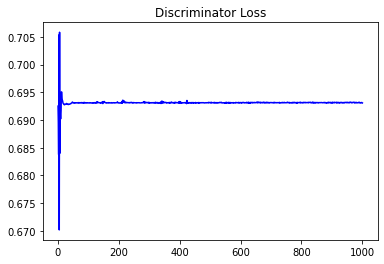

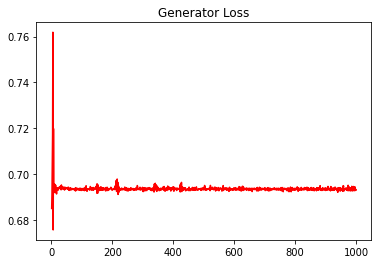

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07021031207474514


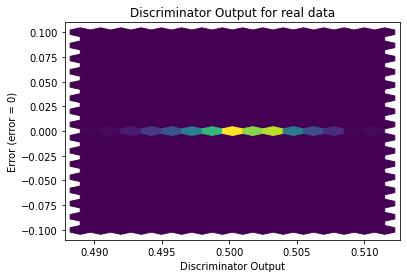

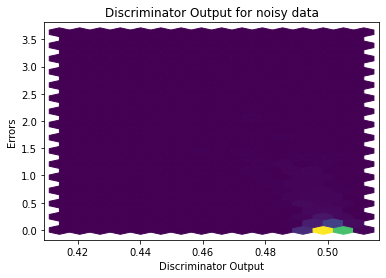

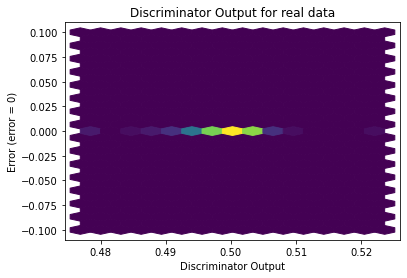

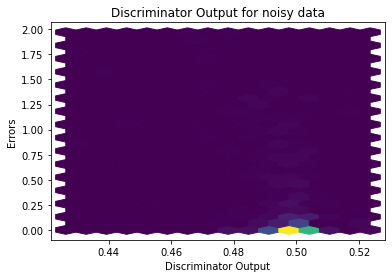

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


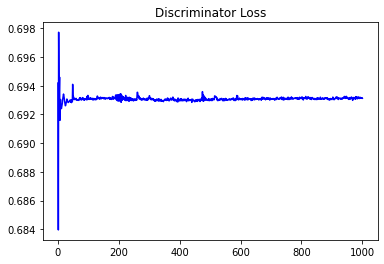

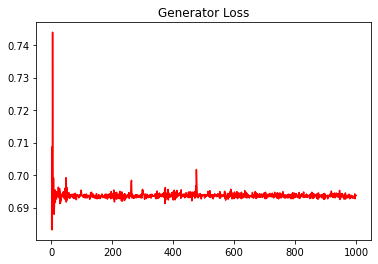

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07233546760855118


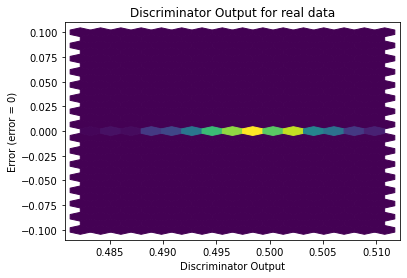

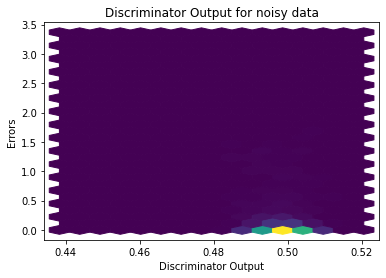

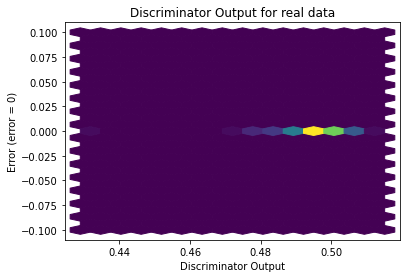

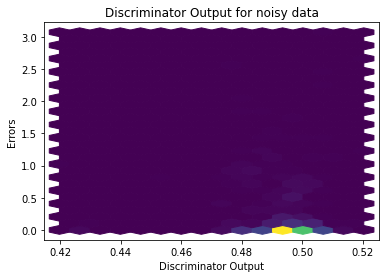

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1264]], requires_grad=True)
